# STEM for Creatives Week 3
## Summarising Data


In this lab, we're going to continue to work on your Python, and introduce some basic maths concepts for examining datasets using the [NumPy](https://numpy.org/doc/stable/) library.

If after this lab you still want to work out whats going on, this [absolute beginners guide](https://numpy.org/doc/stable/user/absolute_beginners.html?highlight=csv) is super useful if you at any point want to do any extra NumPy work.

We have provided you with split of the [This Is My Jam](https://archive.org/details/thisismyjam-datadump) data dump. (Its not all of it because thats massive). We're going to use the Python libraries NumPy, and [Matplotlib](https://matplotlib.org/) to check it out.



In [15]:
pip install brokenaxes


Note: you may need to restart the kernel to use updated packages.


In [25]:
from setuptools import setup, find_packages
# To use a consistent encoding
from codecs import open
from os import path


here = path.abspath(path.dirname(__file__))


with open(path.join(here, 'README.md'), encoding='utf-8') as f:
    long_description = f.read()

setup(
    name='brokenaxes',
    version='0.5.0',
    description='Create broken axes',
    long_description=long_description,
    long_description_content_type="text/markdown",
    author='Ben Dichter',
    url='https://github.com/bendichter/brokenaxes',
    author_email='ben.dichter@gmail.com',
    classifiers=[
        'Intended Audience :: Science/Research',
        'Topic :: Scientific/Engineering',
        'Framework :: Matplotlib',
        'License :: OSI Approved :: MIT License',
        'Programming Language :: Python :: 3.5',
        'Programming Language :: Python :: 3.6',
        'Programming Language :: Python :: 3.7'
    ],

    keywords='data visualization',

    #packages=find_packages(exclude=['docs']),
    py_modules=["brokenaxes"],

    # List run-time dependencies here.  These will be installed by pip when
    # your project is installed. For an analysis of "install_requires" vs pip's
    # requirements files see:
    # https://packaging.python.org/en/latest/requirements.html
    install_requires=['matplotlib>3.4'],

    # List additional groups of dependencies here (e.g. development
    # dependencies). You can install these using the following syntax,
    # for example:
    # $ pip install -e .[dev,test]
    extras_require={
    #    'dev': ['check-manifest'],
        'test': ['pytest'],
    },


    # To provide executable scripts, use entry points in preference to the
    # "scripts" keyword. Entry points provide cross-platform support and allow
    # pip to create the appropriate form of executable for the target platform.
    #entry_points={
    #    'console_scripts': [
    #        'sample=sample:main',
    #    ],
    #},
)

NameError: name '__file__' is not defined

### Loading libraries
Both NumPy and Matplotlib are included in your Anaconda installation, so no need to fetch them again. You can see whats included in Anaconda [here](https://docs.anaconda.com/anaconda/packages/pkg-docs/). Just to prove it we can run the code below.

_Remember_, putting a `!` infront executes the code as if it was in the terminal, not as Python code. This shows which version of the library with have installed, and if it was installed via Anaconda.


In [ ]:
!conda list numpy

In [ ]:
!conda list matplotlib

If you **dont** have them installed, you can use

```!conda install numpy``` and ```!conda install matplotlib```

Even though the packages are installed on the computer, we need to tell the notebook that we are going to use them in this session. We do that using the ```import``` method. When we import the library, we can also give an _alias_. We normally do this to give the library a shorter name for ease when we're coding. The alias is designated using the ```as``` keyword.

Below we are importing both the libraries, and giving them a shortened alias (``np`` for numpy, and the pyplot package from matplotlib as ``plt``)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

### Creating Dimensional Arrays with ``NumPy``

Up until this point, every **List** we have seen can be considered **1 dimensional**, in that is all the items in the list are just single objects like numbers or strings. But, it is possible to have lists in multiple dimensions

It can help to think of a 1D List as a queue, or a shopping list. There are only two directions (backwards and forwards) and you only need 1 index to access an item in it.

You can think of 2D List is a grid, so more like a chess board. You can move in 4 directions (forwads, backwards, left and right) and you need 2 indexes to access any item.

Technically, in a 2D List, each item of the outer array is also another 1D List.

In [ ]:
# Creating a simple array
array = np.array([1, 2, 3, 4, 5])
print(array) # notice how the output doesn't have commas, unlike lists

In [ ]:
# Let's explore the different size dimensions

# Zero Dimensional Array
zero_dim = np.array(6373489934)
print(zero_dim)

In [ ]:
# One Dimensional Array { a good way to know what dimension you're dealing with, check the no. of square brackets }
one_dim = np.array([1, 2, 3])
print(one_dim)

In [ ]:
# Two Dimensional Array
two_dim = np.array([[1, 2, 3], [4, 5, 6]])
print(two_dim)

In [ ]:
# Three Dimensional Array
three_dim = np.array([[[1, 2, 3], [4, 5, 6]], [[7, 8, 9], [10, 11, 12]]])
print(three_dim)

In [ ]:
# Finding the dimension of a given array (in case you're dealing with huuuuuge multi-dimensional array)
print(three_dim.ndim)  # this prints the dimension of a given array

In [ ]:
# Give an array any dimension you want(max = 32 dim so don't go too crazy)
new_array = np.array(17, ndmin=15)
print(new_array)

### Indexing Arrays

In [ ]:
# One Dimension Indexing
array = np.array([2, 4, 3, 9, 1])  # i want the output to be the first element !
print(array[0])  # this returns 2 - the first element in [2, 4, 3, 9, 1]

In [ ]:
# Two Dimension Indexing
two_dim = np.array([[1, 2, 3], [4, 5, 6]])
# try guessing the output before printing?
print(two_dim[0, 0])  # RE
print(two_dim[1, 2])
print(two_dim[1])

### Generating Data

Until this point, we have been working with **Lists** and **Arrays** that we have either hand written ourselves

``
top_buffy_seasons_sorted = [2,5,3,6,1,7,4]
``

Or loaded in from files

``
book_chapters = open('hacking.txt', 'r')
``

However, often when we are working with dataset, debugging code or plotting graphs its useful to **generate lists of numbers** based on some simple rules.

For example


* All the numbers from 0 - 100


* Every fifth number from 0 - 100


* 100 random numbers


Sometimes we _even work with numbers beyond 100_.

**NumPy** has lots of **functions** built in to allow us to do this. We're going to learn about 2 of them, and then use them to make some **plots**.


### ``np.arange(start, end, step)``

What we see here is first generating a equally spaced range of numbers using ```np.arange()```. Here we get the first 100 (0-99).


In [ ]:
#Generate numbers 0-99
x = np.arange(100)
print(x)

### ``np.random.randint(low, high, size)``

We then use the ```np.random.randint``` function to generate 100 random numbers from 0 - 99. Run the code below a few times.

1. Do the random numbers change every time?


2. Are there duplicated numbers?

In [ ]:
#Generate 100 random numbers in the range 0-99
x = np.random.randint(0,100,100)
print(x)

[81 33 44 16 50 32 61  3 97  1  8  1 65 22 48 93 65 20 19 76 25 17 16 76
 11 19 32 65 39  3 15 34 32 39 60 13 34  0 61 55  4 44 48  7 95 95  9 95
 97 91 68 98 30 86 11 57 39 61 18 49 61 91 12 85 16 58 91 15 34 35 73 56
 79 49 76 26 17 81 51 50 91 13 76 83 31 72 95  6 99 17  8 38  9 94 45 16
 42 56 66 58]


## Plotting Data with `matplotlib.pyplot`

### What data do we need to make a plot?

At its simplest, a `plot` or `graph` has **2 axes**, each corresponding to a variables of a dataset. By plotting them against each other, we are able to learn something about the relationship between the variables. Each data point can be shown individually, or joined together in a line.

Traditionally, the horizontal axis is known as the **x axis** and the vertical axis is known as the **y axis**.

For example, we might want to see :


- Time (`x`) against amplitude (`y`) for an audio file


- Height (`x`) against weight (`y`) for a population


- Temperature (`x`) against ice cream sales (`y`)



### The Data

Each data point that we want to plot should have **2 values**. As we've seen in Python, when storing the multiple data points, it makes sense to use a ``List``.

The data structure we will use for the `matplotlib.pyplot` library is **two lists**, one for each axis.

They should be the same length, with each data point having a corresponding variable in each array

e.g

``
pt1 = (x[0], y[0])
pt2 = (x[1], y[1])
pt3 = (x[2], y[2])
.....
ptn = (x[n], y[n])
``

### `plt.plot(x, y, options) `

The package `matplotlib.pyplot` has a function `plot()`. This takes the lists of the two values as its **first two arguments**.

After this we can add in some **optional extra arguments** to specify other aspects of how the plot is displayed

x [  0  50 100 150 200 250 300 350 400 450 500 550 600 650 700 750 800 850
 900 950]
y [  0  10  20  30  40  50  60  70  80  90 100 110 120 130 140 150 160 170
 180 190]


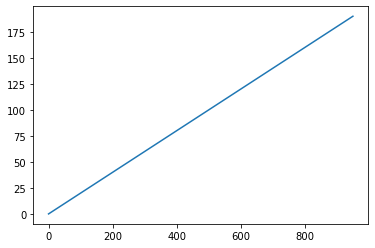

In [ ]:
x = np.arange(0, 1000, 50)
y = np.arange(0, 200, 10)
print("x", x)
print("y", y)
plt.plot(x, y)

We can also do (r)ed d(o)ts

x [ 0  5 10 15 20 25 30 35 40 45 50 55 60 65 70 75 80 85 90 95]
y [67 62  0 89 39 81 49 44  9 40 17 47 41 85 81 97 56 30 94 98]


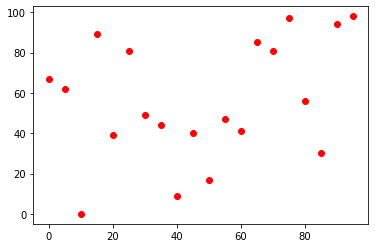

In [ ]:
x = np.arange(0, 100, 5)
y = np.random.randint(0, 100, len(x))
print("x", x)
print("y", y)
plt.plot(x, y,'ro')

Or (g)reen (x)s

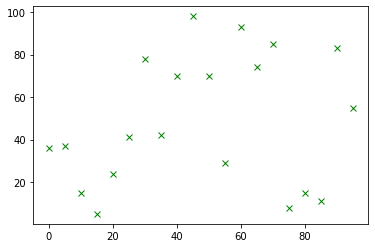

In [ ]:
plt.plot(x, y,'gx')

### Line Functions

When often define functions (which we can then plot as lines) in a format where we can take a value on the x axis, and use the function to determine the value on the y axis. For example

```y = 2x```

We would know that when `x = 2, y = 4` and when `x = 256, y = 512`, and so on. We can then plot these pairs as coordinates.


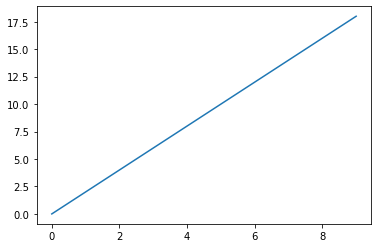

In [ ]:
x = np.arange(10)
y = x * 2
plt.plot(x, y)

### Doing maths with arrays

Above we saw the line

```
y = x * 2
```

Previously we have only done maths with **single numbers**. Whats happening here?

Once you have generated arrays using methods like ```np.arange``` and ```np.random.randint```, you can then alter then using simple maths notatation. If ```a``` is an array, when we say ```a = a + 1```, we would add one to **every** item in the array. When we say ```a = a * 2``` we would double **every** item in the array.

This is something we'll end up doing alot, and doing it this way is **much cleaner** and **much more efficient** than using a ``for loop``

In [ ]:
#Generate array of 0-9
a = np.arange(10)
print(a)
#Add 1 to every value
print(a + 1)
#Subract 2 from every value
print(a - 2)
#Multiply every value by 100
print(a * 100)

[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]
[-2 -1  0  1  2  3  4  5  6  7]
[  0 100 200 300 400 500 600 700 800 900]


# This Is My Jam

So its hard find anything out about that random data because, well, its random. Now lets look at some actual data generated by acutal people using a now defunct music platform called _This Is My Jam_. I've done quite abit of wrangling already to get this data into a usable state from the original dump, and here I give just the top 25,000 most liked songs.

We'll see if we gain any insight into the how music is consumed using this data.

In [ ]:
file = open('data/thisismyjam_top25k.tsv')
#This data uses tabs to separate each point, not the usual commas. Can you think why?
this_is_my_jam_dataset = np.loadtxt(file, delimiter = "\t",  dtype = 'O')
#Convert everything in the 5th column to an integer (number)
this_is_my_jam_dataset[:,4] = this_is_my_jam_dataset[:,4].astype(int)

### `np.array`, `shape`

When we are working with ``NumPy``, the type of **Lists** that we work with are actually their own _slightly different_ data structure.

This is called an ``np.array`` and works very similarly to a List, with some additional functionality.

For example, when we have an array with **more than one dimension**, we can use the ``shape()`` function to get the dimensions

In [ ]:
#Lets look at the shape. There are 25,000 tracks, each with 5 values
this_is_my_jam_dataset.shape

(25000, 5)

In [ ]:
#What info do we have about each track?
#id, title, artist, date added and total number of likes
this_is_my_jam_dataset[4002]

array(['2e279cefb935f6261e56c2b50518e3f1', 'Beach House', 'Lazuli',
       '15/12/2012', 27], dtype=object)

### Plotting a single column of data

Here we plot every song, with the number of likes for each song on the y axis

In this situation, we are **only interested in one of the five columns** of this dataset. This is the fifth and final one that contains the **total likes for that track**.

The same way that we have selected **slices** from 1 dimensional Lists before, we can also slice **columns**.

### `:`

Using the `:` symbol, we can tell **NumPy** that we want to take **every value in that dimension**

For example, this line tells us to take all of the rows (every song), but just the 5th column

``
just_likes = this_is_my_jam_dataset[:,4]
``



In [ ]:
#Separate out the just the likes column (the fifth colum, indexed 4 (we start at 0!))
#The : tells us to take ALL the rows
just_likes = this_is_my_jam_dataset[:,4]

In [ ]:
#More generally
a = np.array([[1,2,3],[4,5,6],[7,8,9]])
print(a)
print("get first column")
print(a[:,0])
print("replace first column")
a[:,0] = [100,100,100]
print(a)
print("edit second column")
a[:,1] = a[:,1] * 3
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
get first column
[1 4 7]
replace first column
[[100   2   3]
 [100   5   6]
 [100   8   9]]
edit second column
[[100   6   3]
 [100  15   6]
 [100  24   9]]


### Getting the axes with `plt.subplots()`

Previously we have used `plt.plot()` to make our graphs. We passed in the data needed and some options for display in **as arguments to the function**.

When we want some more control over how the plot is displayed, we can use the `plt.subplots()` function first.

``
fig, ax = plt.subplots()
``

This returns two things, which we store in the new variables `fig` and `ax`. These are


- A `Figure`, this represents the container that the plot is stored in. We'll ignore this for now.


- An `Axes`, this represents the plot itself and we can use this to make our plot more informative.


### `ax.plot()`

Now we've created an `Axes` object, we can use `plot()` in the same way we have been doing before.

In fact, the plot we want only really has information **on the y axis** (the total number of likes). The x value simply denotes a new song and this more like an arbitrary id field.

In this case, we can actually just pass in **one list of values** (`just_likes`) and the library will work out how to display it.

### `ax.set_ylabel()`

As the `y axis` has the important information on it, we can help people understand our plots better by labelling them.

`ax.set_ylabel()` allows us to pass in a text value.


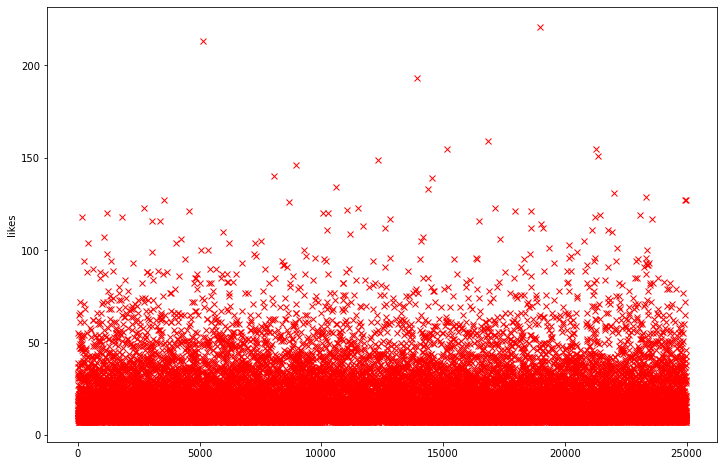

In [ ]:
#plot, here we are making a figure, then adding the plot. This means we can specify the size
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('likes')
ax.plot(just_likes, "rx")

### Sorting

So every x is a different song, with the y axis (the vertical height) demonstrating the total number of likes.

Is that useful? We can't really tell much from this data apart, apart from there are lots and lots of songs that got less than 50 likes, and a few that got more.

Lets sort it. Run the cell below and check out the sorted graph.

### `sorted()`

The `sorted()` function takes a **List** as an argument and returns a **sorted version of that list**.


In [ ]:
a = [4,3,2,1]
a = sorted(a)
print(a)

[1, 2, 3, 4]


Here we add in an extra argument to tell it to sort the **2D list** based on the values in a given column.

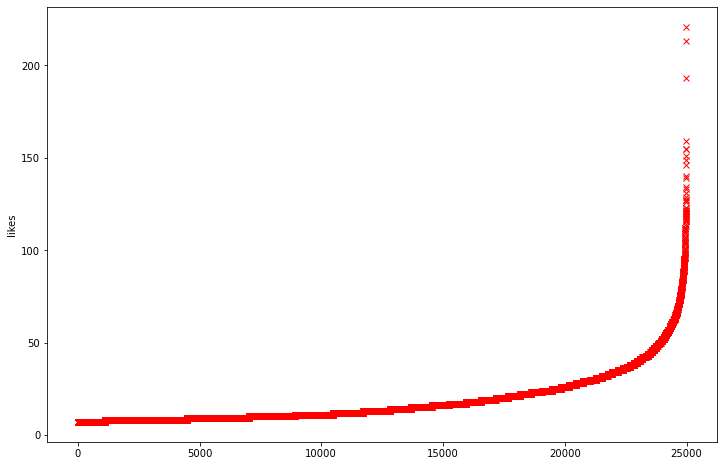

In [ ]:
#Here we sort based on on the 5th column (likes) (dont worry about the code)
sorted_likes = np.array(sorted(this_is_my_jam_dataset, key=lambda x: x[4]))
just_likes = sorted_likes[:,4]
fig, ax = plt.subplots(figsize=(12,8))
#Set the y axis label
ax.set_ylabel('likes')
ax.plot(just_likes, "rx")

### The Most Popular Songs

So it looks like there are a few songs that are **much much** more popular than others.

What are they?

We can use a couple of **indexing tricks** to get the final few rows from the dataset

#### `-`

We can use the **negative indexes** to pick a point **from the end**


#### `:`

We can then use the `:` to say

``
"From this point to the end"
``

So the code below tells us

``
Get me the rows from the 6th last, up until the end
``

In [ ]:
print(sorted_likes[-6:])

[['a0041c8a65103f15796f94aaffff0a57' 'Foals' 'Inhaler' '21/11/2012' 155]
 ['fe85d89ceecc834f1cac81cab59dc184' 'Florence + the Machine'
  'What the Water Gave Me' '24/04/2012' 155]
 ['caa282f8b2668135ab3063e64bbfe40b' 'The Black Keys' 'Lonely Boy'
  '10/12/2012' 159]
 ['b7cbcd002400779bdb5443e74119d942' 'Jimmy Page and Robert Plant'
  'Kashmir' '16/09/2012' 193]
 ['964c043c56bbe152f0aa0f9867779c28' 'Roger Waters and Eddie Vedder'
  'Comfortably Numb' '14/12/2012' 213]
 ['30bd1528d671589a24c5ff9b9c53f3ee' 'Tame Impala' 'Elephant'
  '11/11/2012' 221]]


If we just wanted the **artist and song title**, we can also specify that we only want the 1st (inclusive) to the 3rd (exclusive) (`1:3`)

In [ ]:
print(sorted_likes[-6:,1:3])

[['Foals' 'Inhaler']
 ['Florence + the Machine' 'What the Water Gave Me']
 ['The Black Keys' 'Lonely Boy']
 ['Jimmy Page and Robert Plant' 'Kashmir']
 ['Roger Waters and Eddie Vedder' 'Comfortably Numb']
 ['Tame Impala' 'Elephant']]


### Filters

We can rephrase the question

*What are the top ``n`` most popular songs?*

With

*What are the songs that have been liked over `n` times?*

And ``NumPy`` gives us some easy tools to do this. We can create a **Filter** which poses a **conditional test** (like we did with **if-else statements**).

This will test every item in the list, and return only the ones where the **test holds True**

In [ ]:
## Just the rows where the value in the fifth column is over 140
test = sorted_likes[:,4]>140
print(sorted_likes[test])

[['dfabfd4389b7fcbf9a79a48caf51d9ab' 'Massive Attack' 'Protection'
  '02/05/2012' 146]
 ['b0eba6f44a3c97681f3be13a65aa15ee' 'Roxy Music'
  'Love Is the Drug (Todd Terje Disco Dub)' '09/12/2012' 149]
 ['2f8711a46fcf4e08dbf0dd2b1dd031e8' 'The Velvet Underground'
  'Pale Blue Eyes' '20/08/2012' 151]
 ['a0041c8a65103f15796f94aaffff0a57' 'Foals' 'Inhaler' '21/11/2012' 155]
 ['fe85d89ceecc834f1cac81cab59dc184' 'Florence + the Machine'
  'What the Water Gave Me' '24/04/2012' 155]
 ['caa282f8b2668135ab3063e64bbfe40b' 'The Black Keys' 'Lonely Boy'
  '10/12/2012' 159]
 ['b7cbcd002400779bdb5443e74119d942' 'Jimmy Page and Robert Plant'
  'Kashmir' '16/09/2012' 193]
 ['964c043c56bbe152f0aa0f9867779c28' 'Roger Waters and Eddie Vedder'
  'Comfortably Numb' '14/12/2012' 213]
 ['30bd1528d671589a24c5ff9b9c53f3ee' 'Tame Impala' 'Elephant'
  '11/11/2012' 221]]


### Skewed data

Here we see the same pattern we saw in the other plot but much clearer. There is just a masssssssssive tail. Lots of songs with near 0 likes and small amount with lots. We would call this data **skewed**.

What we mean by this is that it is **not** centered around some nice average middle value, with sides sloping off in a classic bell shape.

And also remember _this is already the top 25k most liked songs (from > 1 million)_, so we have already discounted 100,000s of songs with near to 0 likes. This is a pattern you would see with alot of streaming services, with a few really popular songs / movies and then a long tail of much less popular stuff.


### Histograms

Histograms are a way of summarising data by collecting it into a smaller number of bins. For example, if the full range of data is 0-250, and we ask for 25 bins, we'll get a bar chart that collects together each count in ranges of 10 (0-10,11-20,21-30...). This can be a nice way of getting a rough idea of the shape of how data is distributed.

We can again see that there is lots of songs with a small amount of likes, and a long tail trailing off. **Note**, we are now using the x axis to show number of likes, this is just a standard way to show a histogram.

#### `ax.set_xticks()`, `ax.set_xticklabels()`

In this plot we have are using the functions `ax.set_xticks()` and `ax.set_xticklabels()` to specify the markers and numbers along the x axis.

If we don't set them explicitly, `matplotlib` will try and work out what it thinks is best, which is sometimes OK, but sometimes not! For example, here, having a finer grain set of **ticks**, allows us to better understand the smaller bins to the left.

Here, we use ``np.arange`` to generate a new list with the numbers **0->300 in steps of 10**. We then set the **ticks**, which is an array of numbers used to set the markers, and the **ticklabels**, which is the actual text labels underneath


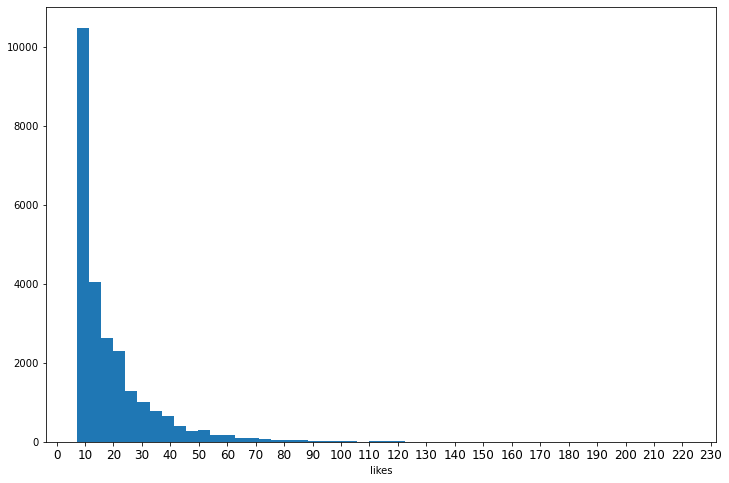

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
number_of_bins = 50
ax.set_xlabel('likes')
#Set the "ticks" on the x axis for 0->300 in steps of 10
xticks = np.arange(0, 300, 10)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=12);
h = ax.hist(just_likes, bins=number_of_bins)

### Changing the scale

With all these views on the skewed data, we loose lots of information where its all bunched up together (in our case in the less liked songs). One way to improve this is to move from a **linear** to a **logarithmic** scale.

With a **linear** scale (what we have been using up until now), every number of likes has taken up the same amount of screen real-estate across the whole range.

For example, if 1-2 likes covers 5 pixels, so does 45-46 and 245-246.

A **logarithmic** scale means that smaller values take up more space on the screen, and the values further up get squished together, so in situtations like this where there's alot of interesting stuff happening at the bottom end, and a small amount of data taking up lots of room in the higher values, its perfect.

Using this log scale on the standard scatter plot we can now see a lot more detail about how the less played songs are distributed.

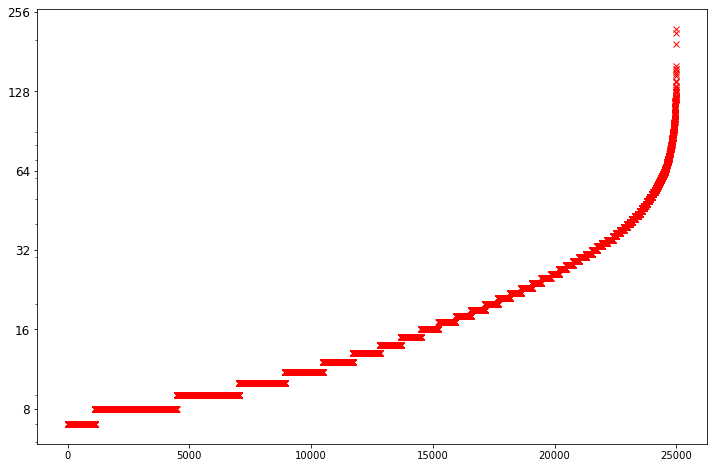

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_yscale('log')
#Set the "ticks" on the y axis to accomodate log spacing
yticks = [1,2,4,8,16,32,64,128,256]
ax.set_yticks(yticks)
ax.set_yticklabels([y for y in yticks], fontsize=12);
ax.plot(just_likes, "rx")

### Log histogram

And for the histogram (this time using the log scale in the x axis), we get tonnes more resolution in the lower bins when we use a larger number of bins. This gives us more insight into how the songs likes a distributed amongst the lower ranges. Here we can again see lots of the songs have 7 or less likes (maybe a third of them?) and then theres a pretty steep drop off as we move into more songs with more likes.

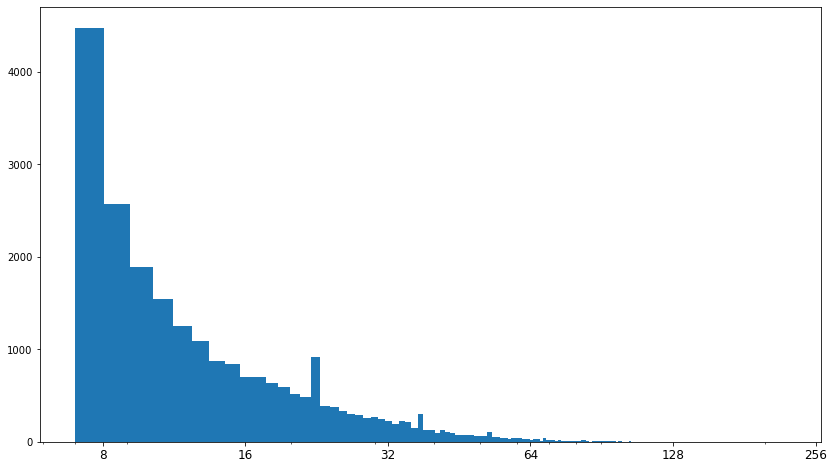

In [ ]:
fig, ax = plt.subplots(figsize=(14,8))
ax.set_xscale('log')
#Set the "ticks" on the x axis to accomodate log spacing
xticks = [1,2,4,8,16,32,64,128,256]
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, fontsize=12);
number_of_bins = 200
#Plot the likes (4th column)
h = ax.hist(just_likes, bins=number_of_bins)

### Averages

So far we have been using different plotting methods to get a feel for our data. Different types of averages can also be good stats to plot on our graphs to get a feel for how it is distributed and there are three common ways using determining the averages.

1. Mean - The sum of all values, divided by the number of values. We can use the built in `np.mean()` function.


2. Mode - The most frequent value. There is not a function in `NumPy` to calculate this, however, we can use the `Counter` object imported from the `collections` package. This counts up the occurences of each unique item in the list. This then has a function `most_common()` which will give us the Mode.


3. Median - The middle value. We can use the built in `np.median()` function.

Each one comes with advantages and disadvantages. For example, a mean can be overly affected by extreme values. Equally, both the mode and the median are only capable of returning values that are already in the data set so wouldn't work well for really unbalanced, or sparse, data.

In [ ]:
from collections import Counter
#Mean
mean = np.mean(just_likes)
print(mean)
#Median
median = np.median(just_likes)
print(median)
#Mode
mode = Counter(just_likes).most_common(1)[0][0]
print(mode)
#Min
print(np.min(just_likes))

18.67612
13.0
8
7


### Multiple Plots on The Same ``Axes``

Here we plot the values on the main graph.

We can just call `plot()` again on the same `ax` object and it gets drawn on the same graph.

Here, we give each one a **different display option**, and its own `label`. This means when we call `plt.legend()`, the label can be used to **show which shape represents each value**

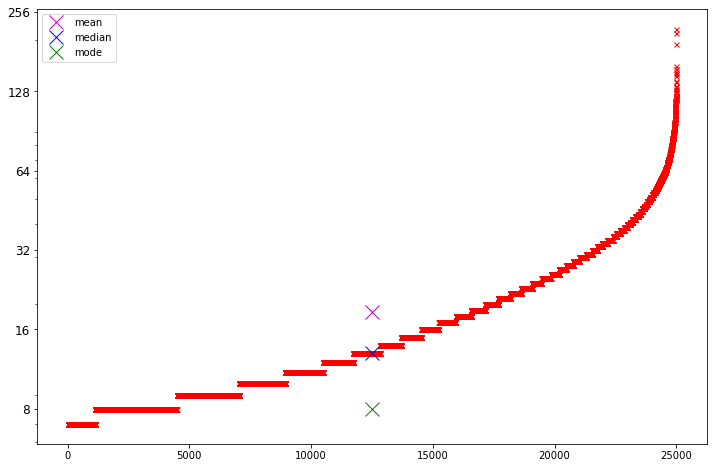

In [ ]:
fig, ax = plt.subplots(figsize=(12,8))
ax.set_yscale('log')
#Set the "ticks" on the y axis to accomodate log spacing
yticks = [1,2,4,8,16,32,64,128,256]
ax.set_yticks(yticks)
ax.set_yticklabels([y for y in yticks], fontsize=12);
ax.plot(just_likes, "rx", ms = 5)

#Get x point in middle
mid_x = [len(just_likes)/2]

ax.plot(mid_x, [mean], "mx", ms = 14, label = "mean")
ax.plot(mid_x, [median], "bx", ms = 14, label = "median")
ax.plot(mid_x, [mode], "gx", ms = 14, label = "mode")
#Add key
plt.legend()

### What does it tell us?

What we see here is the mean gives the highest value (effected by those highly listened to tracks). The mode is lowest, again showing us that there is a weighting towards tracks liked a small number of times. I also printed out the minimum to see how close 8 was to the bottom, and its 7.

In this case, the **median probably summarises the data the best**, but **none of the numbers really tell us about the whole picture**.


### Round up

To summarise, we've seen how we can use different plots, stats, and scales to explore some user preference data from a music streaming service.

- Just plotting the data in its given order didn't show us much as there were way too many datapoints. Other plots, or summary statistics can get further insight.
- Sorting the data and plotting it made the trend in the skewed data clearer.
- Box and Whisker plots and Histograms also were a way to demonstrate this skew (lots of low values).
- The plotting the means, medians and modes can also tell us more about the data.
- When we have this skew, using a **logarithmic** scale can give better resolution to lower ranges.